In [1]:
# if you want to play around with prosodic, use this notebook

## run this cell to install prosodic, then restart runtime as requested
#%apt-get install espeak libespeak1 libespeak-dev
%pip install -U prosodic

Note: you may need to restart the kernel to use updated packages.


In [2]:
##run this to import prosodic and avoid excessive logging

import prosodic
prosodic.logger.setLevel('ERROR')


The cells below give you three options for turning a line, set of lines, or .txt file of lines into prosodic.Text to then be parsed later. set the meter first. changing the meter will not automatically change parses unless you change the inputted text (this is a known bug)

In [3]:
# these are the meter parameters.
# if you want to play around with different rules and values, do that and make sure to change the inputs and rerun

constraints={
    'w_peak':3.0,
    'w_stress':1.0,
    's_unstress':1.0,
    'unres_across':1.0,
    'unres_within':1.0,
    'pentameter':20.0,
}
meter = prosodic.Meter(
    constraints=constraints,
    resolve_optionality=True,
    max_s=1,
    max_w=2,
)

meter.to_dict()

{'Meter': {'key': 'Meter(b075b237503b65e53a9a133714151b2e)',
  'constraints': {'w_peak': 3.0,
   'w_stress': 1.0,
   's_unstress': 1.0,
   'unres_across': 1.0,
   'unres_within': 1.0,
   'pentameter': 20.0},
  'max_s': 1,
  'max_w': 2,
  'resolve_optionality': True,
  'exhaustive': False,
  'parse_unit': 'linepart'}}

In [5]:
## parse by string. this cell turns one line into a prosodic Text object that can be parsed

singleline = prosodic.Text("""
The silent woods conceal their **BE**ginning
""")

parses = singleline.parse()
df = parses[0].stats()

df

# if you want just the pretty parse, you can get it for the best parse only right now. You can't hover over, sorry. run it in a new cell to preserve the df printout here

parses[0].best_parse

Parse(num=1, txt='the SI lent WOODS con CEAL their.be GIN ning')

In [ ]:
parselist= parses[0]
parselist


ParseList([
    Parse(num=1, txt='my LONG scythe WHIS pered.and LEFT the HAY to MAKE'),
    Parse(num=2, txt='my LONG scythe WHIS.PERED and LEFT the HAY to MAKE'),
    Parse(num=3, txt='my LONG scythe WHIS pered AND left THE hay TO make')
 ])

None


In [ ]:
# if you wish to run multiple lines, copy then in here

yourlines = prosodic.Text("""
the chatbot tried to write in perfect verse
but it didn't do a good job. it was worse.
""")


In [ ]:
## if you wish to use a .txt. replace with your filepath

txtlines = prosodic.Text(fn='/content/sample_data/chatgpt_answers.txt')

Now we parse. Set meter constraints first


In [ ]:
## parse here. note you'll need to choose singleline, yourlines, or txtlines by un-commented as needed

parse = singleline.parse()


#parse = yourlines.parse(meter=meter)

#parse = txtlines.parse()


#parse = line.parse()

df = parse.stats()

df

,,,,,,,,,,parse_score,parse_num_viols,parse_ambig,parse_is_bounded,parse_num_sylls,parse_num_words,*w_peak,*w_stress,*s_unstress,*unres_across,...,*total_sylls,*total,*w_peak_norm,*w_stress_norm,*s_unstress_norm,*unres_across_norm,*unres_within_norm,*foot_size_norm,*total_sylls_norm,*total_norm
stanza_num,line_num,line_txt,linepart_num,parse_rank,parse_txt,parse_meter,parse_stress,sent_num,sentpart_num,,,,,,,,,,,,,,,,,,,,,
1,1,the expense of spirit in a waste of shame,1,1,the.ex PENSE of SPI rit IN a WASTE of SHAME,--+-+-+-+-+,--+-+-+-+-+,1,1,1.0,1,2,0,11,9,0.0,0.0,0.0,1.0,...,1,1,0.0,0.0,0.0,0.090909,0.0,0.0,0.090909,0.090909


In [ ]:

singleline = prosodic.Text("""
the expense of spirit in a waste of shame
""")


for parse in singleline.parse(meter=meter):
  df = parse.stats()
df


[173.26s] Parsing lineparts:   0%|          | 0/1 [00:00<?, ?it/s]

parse_score  \
stanza_num line_num line_txt                                  linepart_num parse_rank parse_txt                                   parse_meter parse_stress sent_num sentpart_num                
1          1        the expense of spirit in a waste of shame 1            1          the.ex PENSE of SPI rit IN a WASTE of SHAME --+-+-+-+-+ --+-+-+-+-+  1        1                     1.0   
                                                                           2          THE ex.pense OF spi.rit IN a WASTE of SHAME +--+--+-+-+ --+-+-+-+-+  1        1                    11.0   
                                                                           3          THE ex PENSE of SPI rit IN a WASTE of SHAME +-+-+-+-+-+ --+-+-+-+-+  1        1                    21.0   

                                                                                                                                                                                  parse_num_viols  \
stanza_num line_num line_txt                                  linepart_num parse_rank parse_txt                                   parse_meter parse_stress sent_num sentpart_num                    
1          1        the expense of spirit in a waste of shame 1            1          the.ex PENSE of SPI rit IN a WASTE of SHAME --+-+-+-+-+ --+-+-+-+-+  1        1                           1   
                                                                           2          THE ex.pense OF spi.rit IN a WASTE of SHAME +--+--+-+-+ --+-+-+-+-+  1        1                           7   
                                                                           3          THE ex PENSE of SPI rit IN a WASTE of SHAME +-+-+-+-+-+ --+-+-+-+-+  1        1                           2   

                                                                                                                                                                                  parse_ambig  \
stanza_num line_num line_txt                                  linepart_num parse_rank parse_txt                                   parse_meter parse_stress sent_num sentpart_num                
1          1        the expense of spirit in a waste of shame 1            1          the.ex PENSE of SPI rit IN a WASTE of SHAME --+-+-+-+-+ --+-+-+-+-+  1        1                       3   
                                                                           2          THE ex.pense OF spi.rit IN a WASTE of SHAME +--+--+-+-+ --+-+-+-+-+  1        1                       3   
                                                                           3          THE ex PENSE of SPI rit IN a WASTE of SHAME +-+-+-+-+-+ --+-+-+-+-+  1        1                       3   

                                                                                                                                                                                  parse_is_bounded  \
stanza_num line_num line_txt                                  linepart_num parse_rank parse_txt                                   parse_meter parse_stress sent_num sentpart_num                     
1          1        the expense of spirit in a waste of shame 1            1          the.ex PENSE of SPI rit IN a WASTE of SHAME --+-+-+-+-+ --+-+-+-+-+  1        1                            0   
                                                                           2          THE ex.pense OF spi.rit IN a WASTE of SHAME +--+--+-+-+ --+-+-+-+-+  1        1                            0   
                                                                           3          THE ex PENSE of SPI rit IN a WASTE of SHAME +-+-+-+-+-+ --+-+-+-+-+  1        1                            0   

                                                                                                                                                                                  *pentameter  \
stanza_num line_num line_txt                                  linepart_num p

In [ ]:
parse.stats()

,,,,,,,,,,parse_score,parse_num_viols,parse_ambig,parse_is_bounded,parse_num_sylls,parse_num_words,*w_peak,*w_stress,*s_unstress,*unres_across,...,*total_sylls,*total,*w_peak_norm,*w_stress_norm,*s_unstress_norm,*unres_across_norm,*unres_within_norm,*foot_size_norm,*total_sylls_norm,*total_norm
stanza_num,line_num,line_txt,linepart_num,parse_rank,parse_txt,parse_meter,parse_stress,sent_num,sentpart_num,,,,,,,,,,,,,,,,,,,,,
1,1,the expense of spirit in a waste of shame,1,1,the.ex PENSE of SPI rit IN a WASTE of SHAME,--+-+-+-+-+,--+-+-+-+-+,1,1,1.0,1,2,0,11,9,0.0,0.0,0.0,1.0,...,1,1,0.0,0.0,0.0,0.090909,0.0,0.0,0.090909,0.090909


In [ ]:
## this is a pretty display for a few lines. edit if you are inputing oneline or a txt file

for line in txtlines.lines:
  line.parse()
  display(line.best_parse)

In [ ]:
## function to print out a pretty version for just one line #

def print_best_parse_for_line(line_number):
  """Prints the best parse for a given line number from txtlines.

  Args:
      line_number: The line number (starting from 0) to print the parse for.
  """
  try:
    display(txtlines.lines[line_number-1].best_parse)
  except IndexError:
    print(f"Error: Line number {line_number} is out of range.")


# Example usage: Print the best parse for line 18
print_best_parse_for_line(18)

Parse(num=1, txt='our ME mo RIES tell MORE a BOUT.NOW than THEN')

In [ ]:
##if you want to view all the parses for a given line.
#Note that there may be several parses with the same score, and prosodic will only choose one to show you. There is probably a way to see all the equally good parses.

trickline = prosodic.Text('Our memories tell more about now than then.')
trickline.parse()

for parse in trickline.parses:
  display(parse)



In [ ]:
paradiselost = prosodic.Text(fn='/content/sample_data/plost23lines.txt')

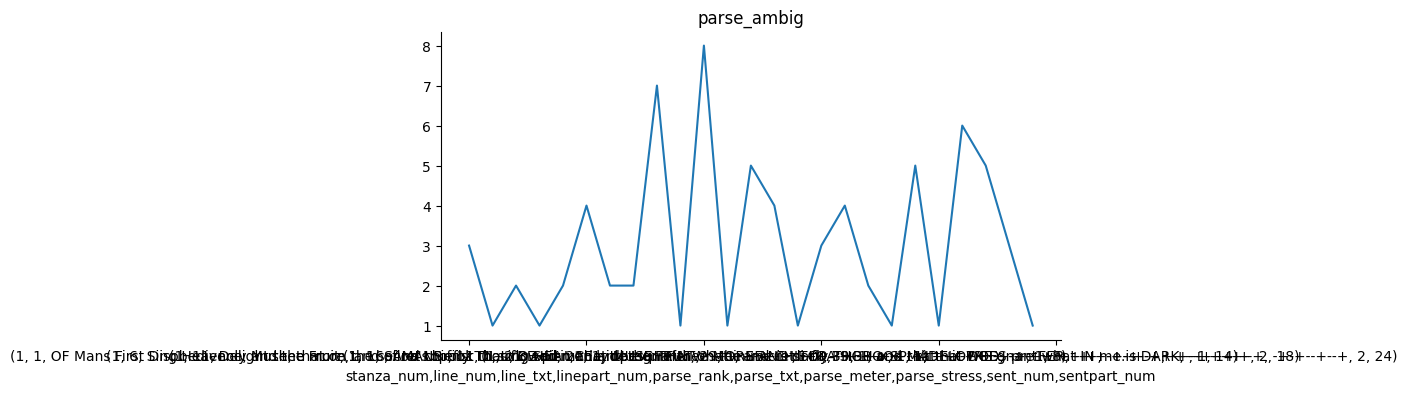

In [ ]:
from matplotlib import pyplot as plt
df['parse_ambig'].plot(kind='line', figsize=(8, 4), title='parse_ambig')
plt.gca().spines[['top', 'right']].set_visible(False)

could calculate distance between parse scores line by line, check the average, maybe logarythmically / with softmax-like function so that higher scores don't warp things too much. or just 0 / not zero

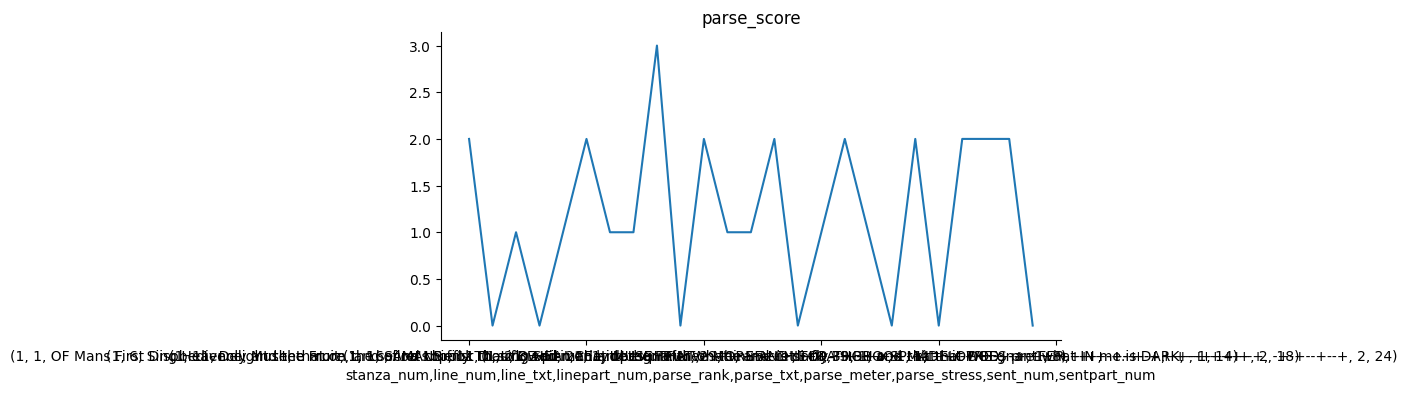

In [ ]:
from matplotlib import pyplot as plt
df['parse_score'].plot(kind='line', figsize=(8, 4), title='parse_score')
plt.gca().spines[['top', 'right']].set_visible(False)

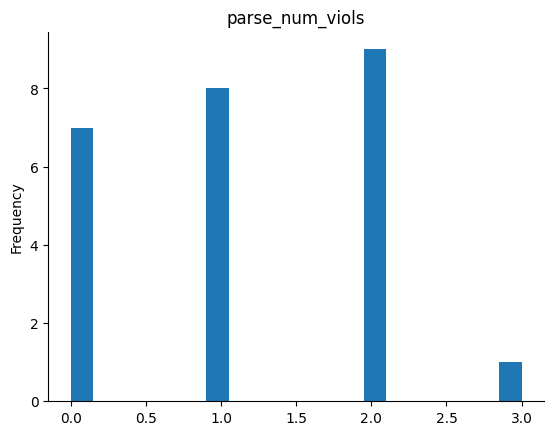

In [ ]:
from matplotlib import pyplot as plt
df['parse_num_viols'].plot(kind='hist', bins=20, title='parse_num_viols')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
satanlines = prosodic.Text(fn='/content/sample_data/satanfirstspeech.txt')

In [ ]:
parse = satanlines.parse()


#parse = line.parse()

df = parse.stats()

df

[57.42s] Parsing lineparts: 100%|██████████| 60/60 [00:05<00:00,  8.01it/s]

parse_score  \
stanza_num line_num line_txt                                      linepart_num parse_rank parse_txt                                       parse_meter parse_stress sent_num sentpart_num                
1          1        Powers and Dominions, Deities of Heaven,      1            1          PO wers AND do MI nions DEI ti ES of HEAVEN     +-+-+-+-+-+ +---+-+---+  1        1                     2.0   
           2        For, since no deep within her gulf can hold   3            1          since NO.DEEP wit HIN her GULF can HOLD         -++-+-+-+   -++-+-+-+    1        3                     1.0   
           3        Immortal vigor, though oppressed and fallen,  5            1          im MOR tal VI gor THOUGH op PRESSED and FAL len -+-+-+-+-+- -+-+---+-+-  1        4                     1.0   
           4        I give not Heaven for lost: from this descent 7            1          i GIVE not HEAVEN for LOST from THIS des CENT   -+-+-+-+-+  -+-+-+---+   1        6                     1.0   
           5        Celestial virtues rising will appear          9            1          ce LES tial VIR tues RI sing WILL ap PEAR       -+-+-+-+-+  -+-+-+---+   1        7                     1.0   
...                                                                                                                                                                                               ...   
           28       To claim our just inheritance of old,         54           1          to CLAIM our JUST in HE ri TANCE of OLD         -+-+-+-+-+  -+-+-+---+   5        36                    1.0   
           29       Surer to prosper than prosperity              55           1          SU rer.to PROS per THAN pros PE ri TY           +--+-+-+-+  +--+---+--   5        37                    3.0   
           30       Could have assured us; and by what best way,  56           1          could HAVE as SURED us and.by WHAT best WAY     -+-+---+-+  -+-+---+++   5        37                    1.0   
           31       Whether of open war or covert guile,          58           1          WHET her.of O pen WAR or CO vert GUILE          +--+-+-+-+  +--+-+-+-+   5        39                    1.0   
           32       We now debate. Who can advise may speak.      59           1          we NOW de BATE who CAN a DVISE may SPEAK        -+-+-+-+-+  -+-+---+-+   5        40                    1.0   

                                                                                                                                                                                          parse_num_viols  \
stanza_num line_num line_txt                                      linepart_num parse_rank parse_txt                                       parse_meter parse_stress sent_num sentpart_num                    
1          1        Powers and Dominions, Deities of Heaven,      1            1          PO wers AND do MI nions DEI ti ES of HEAVEN     +-+-+-+-+-+ +---+-+---+  1        1                           2   
           2        For, since no deep within her gulf can hold   3            1          since NO.DEEP wit HIN her GULF can HOLD         -++-+-+-+   -++-+-+-+    1        3                           1   
           3        Immortal vigor, though oppressed and fallen,  5            1          im MOR tal VI gor THOUGH op PRESSED and FAL len -+-+-+-+-+- -+-+---+-+-  1        4                           1   
           4        I give not Heaven for lost: from this descent 7            1          i GIVE not HEAVEN for LOST from THIS des CENT   -+-+-+-+-+  -+-+-+---+   1        6                           1   
           5        Celestial virtues rising will appear          9            1          ce LES tial VIR tues RI sing WILL ap PEAR       -+-+-+-+-+  -+-+-+---+   1        7                           1   
...                                                                                                                                      

from matplotlib import pyplot as plt
_df_32['line_num'].plot(kind='hist', bins=20, title='line_num')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_33['linepart_num'].plot(kind='hist', bins=20, title='linepart_num')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_34['sent_num'].plot(kind='hist', bins=20, title='sent_num')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_35['sentpart_num'].plot(kind='hist', bins=20, title='sentpart_num')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_36.plot(kind='scatter', x='line_num', y='linepart_num', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_37.plot(kind='scatter', x='linepart_num', y='sent_num', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_38.plot(kind='scatter', x='sent_num', y='sentpart_num', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_39.plot(kind='scatter', x='sentpart_num', y='parse_score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['stanza_num']
  ys = series['parse_score']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_40.sort_values('stanza_num', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('stanza_num')
_ = plt.ylabel('parse_score')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['stanza_num']
  ys = series['parse_num_viols']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_41.sort_values('stanza_num', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('stanza_num')
_ = plt.ylabel('parse_num_viols')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['stanza_num']
  ys = series['parse_ambig']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_42.sort_values('stanza_num', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('stanza_num')
_ = plt.ylabel('parse_ambig')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['stanza_num']
  ys = series['parse_num_sylls']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_43.sort_values('stanza_num', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('stanza_num')
_ = plt.ylabel('parse_num_sylls')

from matplotlib import pyplot as plt
_df_44['line_num'].plot(kind='line', figsize=(8, 4), title='line_num')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_45['linepart_num'].plot(kind='line', figsize=(8, 4), title='linepart_num')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_46['sent_num'].plot(kind='line', figsize=(8, 4), title='sent_num')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_47['sentpart_num'].plot(kind='line', figsize=(8, 4), title='sentpart_num')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
from matplotlib import pyplot as plt
_df_37.plot(kind='scatter', x='linepart_num', y='sent_num', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

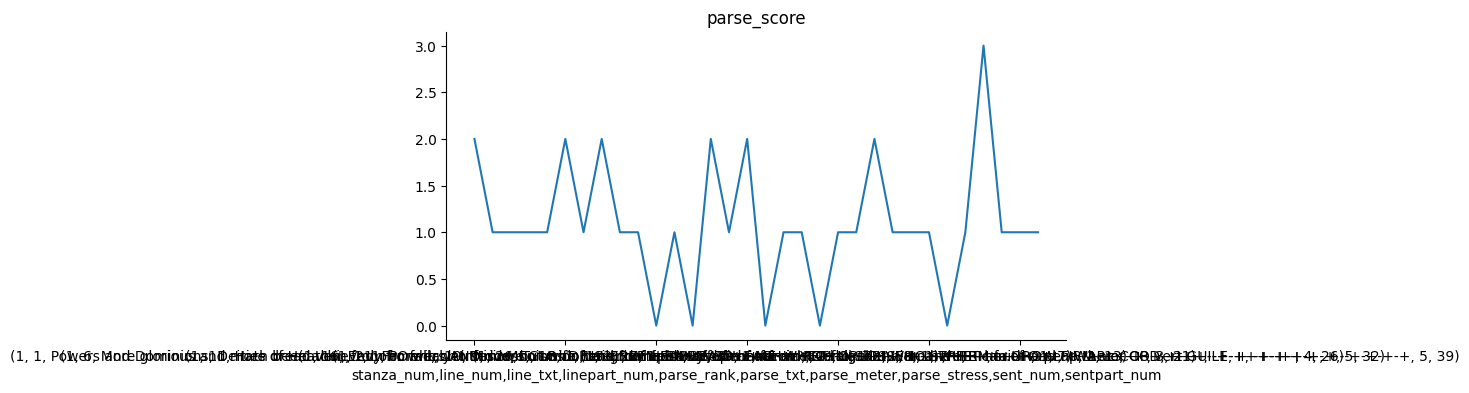

In [ ]:
from matplotlib import pyplot as plt
df['parse_score'].plot(kind='line', figsize=(8, 4), title='parse_score')
plt.gca().spines[['top', 'right']].set_visible(False)

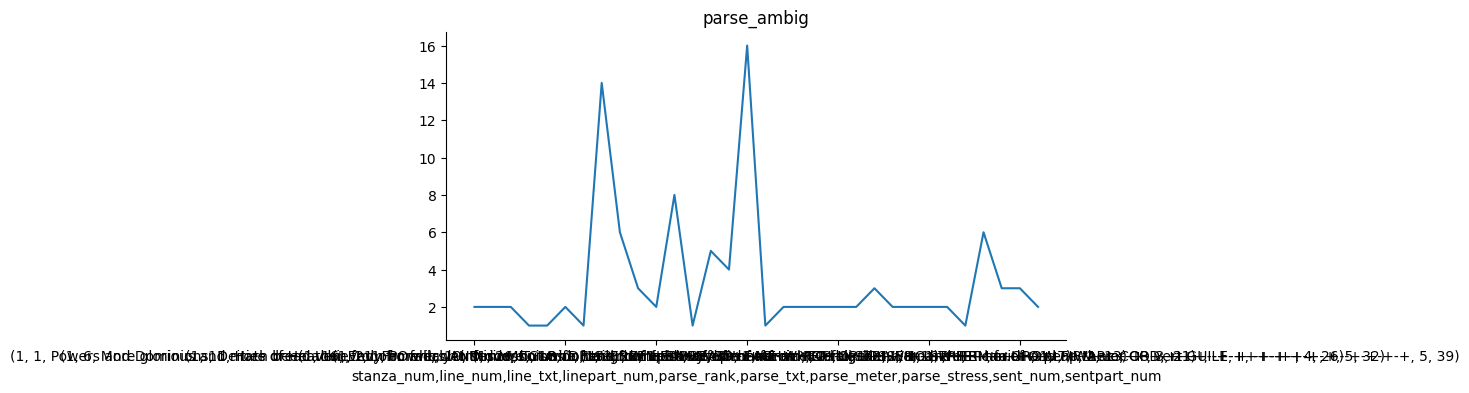

In [ ]:
from matplotlib import pyplot as plt
df['parse_ambig'].plot(kind='line', figsize=(8, 4), title='parse_ambig')
plt.gca().spines[['top', 'right']].set_visible(False)